In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
# Labeling Index

map_month = {'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9, 'Dec':12}
map_visitor = {'Returning_Visitor': 1,'New_Visitor':2, 'Other':3}
df['Month'] = df['Month'].map(map_month)
df['VisitorType'] = df['VisitorType'].map(map_visitor)
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Data Preparation


The target field for this modeling is 'Revenue' and it shows imbalance data. We can avoid the imbalance dataset by using SMOTE oversizing technique. Since the data is already balance, we can use Accuracy as a metric.

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [5]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# initial train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Revenue', axis=1), 
                                                    df['Revenue'], 
                                                    test_size = 0.2, 
                                                    random_state=42)

# SMOTE AND SCALE
X_smoted, y_smoted = SMOTE(random_state=42).fit_resample(X_train,y_train)

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_smoted)
X_test_scaled = std_scale.transform(X_test.values)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# df_train
df_X_train = pd.DataFrame(X_train).reset_index().iloc[:,1:] #reset index and remove index column
df_y_train = pd.DataFrame(y_train).reset_index().iloc[:,1]
df_train = pd.concat([df_X_train, df_y_train], axis = 1, ignore_index = True)
df_train.columns = df.columns

# df_test
df_X_test = pd.DataFrame(X_test).reset_index().iloc[:,1:]
df_y_test = pd.DataFrame(y_test).reset_index().iloc[:,1]
df_test = pd.concat([df_X_test, df_y_test], axis = 1, ignore_index = True)
df_test.columns = df.columns

In [12]:
df_X_train.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               2                     14.0              0   
2               0                      0.0              0   
3               5                     49.2              4   
4               0                      0.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               7                95.000000   
1                     0.0              81              1441.910588   
2                     0.0               1                 0.000000   
3                   379.0               5                74.600000   
4                     5.0               9               279.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.014286   0.061905    0.000000         0.0      3                 2   
1     0.002469   0.013933    2.769599         0.0     11                 2   
2     0.200000   0.200000    0.000000         0.0      3                 2   
3     0.000000   0.018182    8.326728         0.0      9                 2   
4     0.040000   0.041667    0.000000         0.0     11                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  
0        6       1            1            1        0  
1        2       3            2            1        0  
2        2       1            1            1        0  
3        2       8            2            2        0  
4        2       7            8            2        1

# Initial Model Selection

For model selection, first we chose 7 classifiers as model candidates. We will choose the top 4 models for this project.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, log_loss 
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble

In [66]:
lr_model = LogisticRegressionCV(cv=5, random_state=0)
nb_model = naive_bayes.GaussianNB()
knn_model = neighbors.KNeighborsClassifier()
svc_model = svm.SVC(probability=True, gamma='scale')
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()

models = [lr_model, nb_model, knn_model, 
          svc_model, rf_model, et_model, ada_model]
model_names = ['lr_model', 'nb_model', 'knn_model', 
               'svc_model', 'rf_model', 'et_model', 'ada_model']

In [67]:
count = 0
for model in models:
    print(f'Model {count}')
    model.fit(X_train_scaled, y_smoted) # fit the scaled smote data without removing any columns
    count += 1

Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6


In [68]:
count = 0
for model in models:
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Classification Accuracy {model_names[count]}: {accuracy * 100:.2f}%')
    print(f'Classification Recall {model_names[count]}: {recall * 100:.2f}%')
    print('=======================================')
    count += 1

Classification Accuracy lr_model: 86.33%
Classification Recall lr_model: 68.13%
Classification Accuracy nb_model: 59.94%
Classification Recall nb_model: 79.56%
Classification Accuracy knn_model: 78.83%
Classification Recall knn_model: 57.66%
Classification Accuracy svc_model: 86.94%
Classification Recall svc_model: 65.69%
Classification Accuracy rf_model: 88.20%
Classification Recall rf_model: 70.07%
Classification Accuracy et_model: 88.52%
Classification Recall et_model: 68.61%
Classification Accuracy ada_model: 87.31%
Classification Recall ada_model: 68.61%


**Base Model Performance**

In [69]:
def model_metrics(model, X_test, y_test):
    y_predict = model.predict(X_test)  
    cm = confusion_matrix(y_test, y_predict)
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    print('Accuracy: ', model.score(X_test, y_test))
    print('Precision : ', precision_score(y_test, y_predict))
    print('Recall : ', recall_score(y_test, y_predict))
    print('Specificity : ', specificity)
    print('F1 score: ', f1_score(y_test, y_predict))
    print('Logistic loss: ', log_loss(y_test, y_predict))
    print('Confusion Matrix: ','\n', cm)

In [72]:
count = 0
for model in models:
    print(f'Model {count}')
    model_metrics(model, X_test_scaled, y_test)
    print('=======================================')
    count += 1

Model 0
Accuracy:  0.8633414436334145
Precision :  0.5761316872427984
Recall :  0.681265206812652
Specificity :  0.8997566909975669
F1 score:  0.6243032329988851
Logistic loss:  4.92567363833434
Confusion Matrix:  
 [[1849  206]
 [ 131  280]]
Model 1
Accuracy:  0.5993511759935117
Precision :  0.26563769293257516
Recall :  0.7956204379562044
Specificity :  0.5600973236009732
F1 score:  0.3982947624847747
Logistic loss:  14.440847343247261
Confusion Matrix:  
 [[1151  904]
 [  84  327]]
Model 2
Accuracy:  0.7883211678832117
Precision :  0.40512820512820513
Recall :  0.5766423357664233
Specificity :  0.8306569343065694
F1 score:  0.4759036144578313
Logistic loss:  7.629678454630639
Confusion Matrix:  
 [[1707  348]
 [ 174  237]]
Model 3
Accuracy:  0.8694241686942417
Precision :  0.5986696230598669
Recall :  0.656934306569343
Specificity :  0.9119221411192214
F1 score:  0.6264501160092808
Logistic loss:  4.706430004580586
Confusion Matrix:  
 [[1874  181]
 [ 141  270]]
Model 4
Accuracy:  0

# Feature Selection

To filter the feature, we using statistical approximation with Correlation and Information Value metrics. The table to determine which feature is important is below:

|Information Value|Predictive Power|
|---|:---|
|< 0.02|Useless for Prediction|
|0.02 - 0.1|Weak Predictor|
|0.1 - 0.3|Medium Predictor|
|0.3 - 0.5|Strong Predictor|
|> 0.5|Suspicious or too good to be true|


|Correlation Value|Predictive Power|
|---|:---|
|< 0.5|Weak Prediction|
|0.5 - 0.7|Medium Predictor|
|0.7 - 0.9|Strong Predictor|
|0.9 - 1|Very Strong Predictor|

**Correlation Scores**

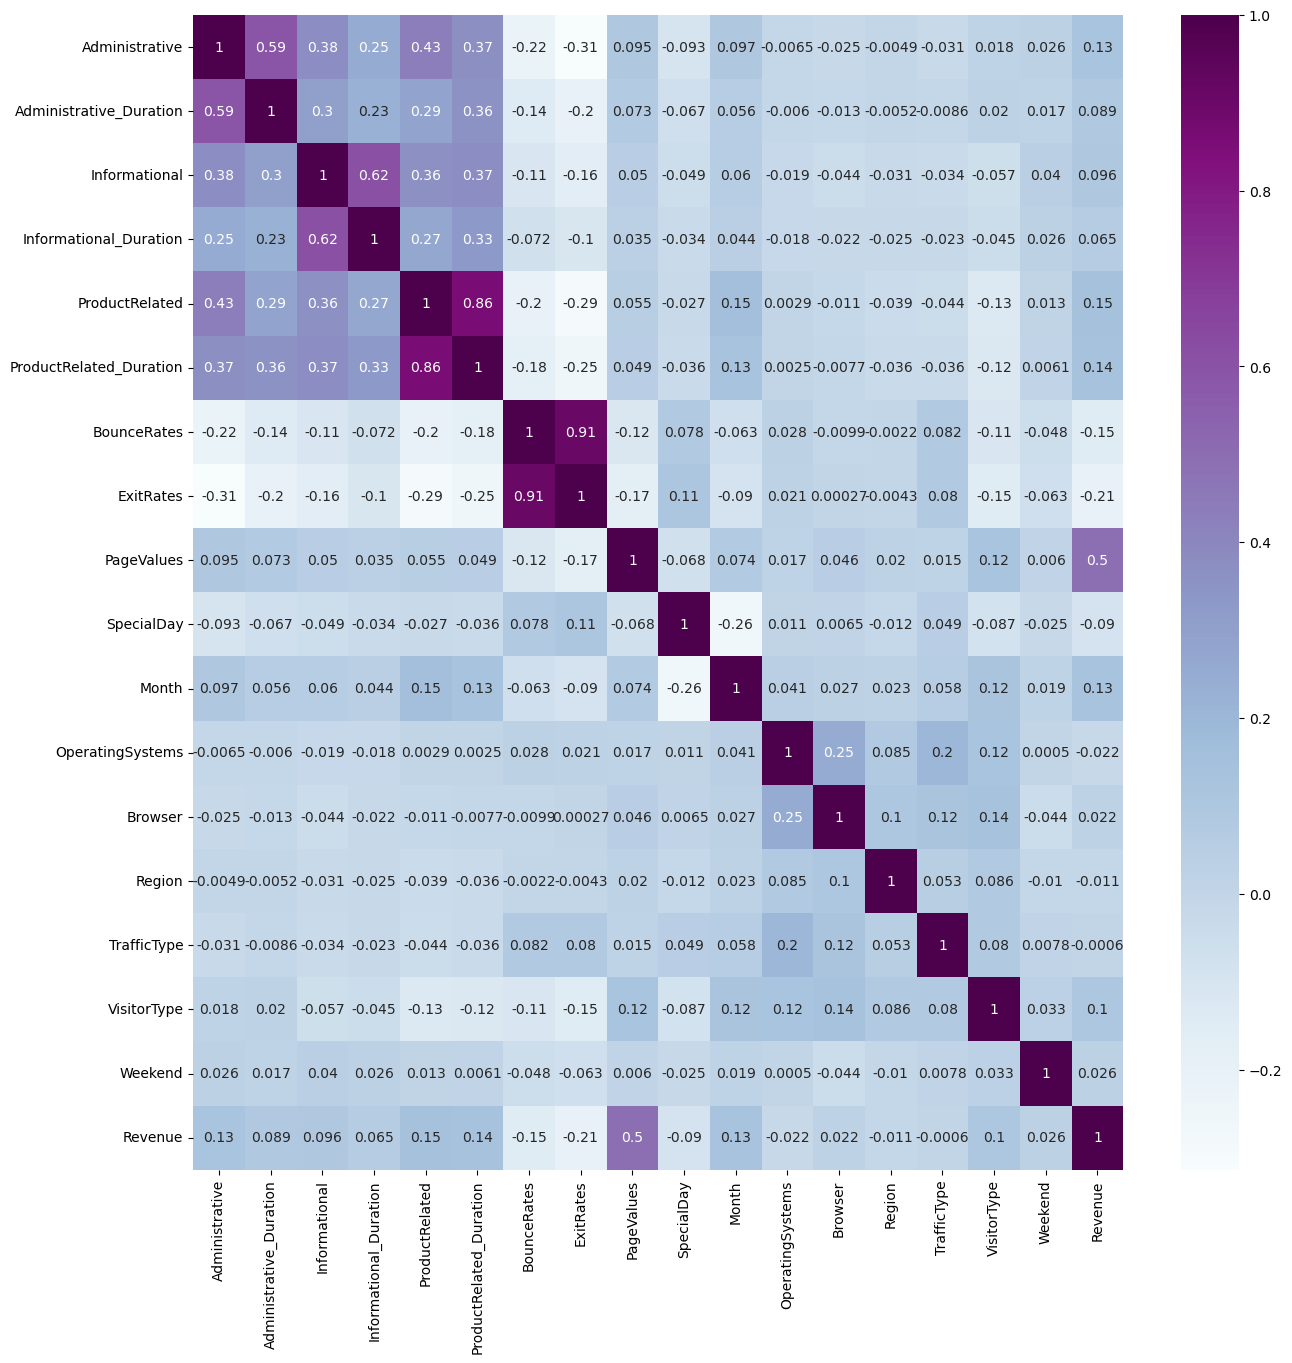

In [17]:
# Correlation scores
plt.subplots(figsize = (15,15))
hm = sns.heatmap(df_train.corr(), cmap='BuPu', annot=True)
plt.show()

In [18]:
abs(df_train.corr().loc['Revenue',:]).sort_values(ascending = False)

Revenue                    1.000000
PageValues                 0.495700
ExitRates                  0.205205
BounceRates                0.147753
ProductRelated             0.145314
ProductRelated_Duration    0.139833
Month                      0.131098
Administrative             0.126812
VisitorType                0.102220
Informational              0.096208
SpecialDay                 0.090200
Administrative_Duration    0.088759
Informational_Duration     0.065073
Weekend                    0.026159
Browser                    0.022380
OperatingSystems           0.021798
Region                     0.010927
TrafficType                0.000605
Name: Revenue, dtype: float64

**SelectFromModel**
1. Use SelectFromModel to pick the most important key features. Then look at correlation values, use key features as the decision factor when there is colinearity.
2. Pick about 8 features, make a subset data set. Then dummies the categorical features. Redo the selection process on dummied data again, pick the final features.
3. Use randomized CV to tune the model

In [19]:
# SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=500))
sel.fit(X_train_scaled, y_smoted)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [20]:
selected_features = X_train.columns[(sel.get_support())]
selected_features

Index(['ProductRelated_Duration', 'ExitRates', 'PageValues', 'Month'], dtype='object')

**Information Value**

In [21]:
df_train.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               2                     14.0              0   
2               0                      0.0              0   
3               5                     49.2              4   
4               0                      0.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               7                95.000000   
1                     0.0              81              1441.910588   
2                     0.0               1                 0.000000   
3                   379.0               5                74.600000   
4                     5.0               9               279.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.014286   0.061905    0.000000         0.0      3                 2   
1     0.002469   0.013933    2.769599         0.0     11                 2   
2     0.200000   0.200000    0.000000         0.0      3                 2   
3     0.000000   0.018182    8.326728         0.0      9                 2   
4     0.040000   0.041667    0.000000         0.0     11                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        6       1            1            1        0        0  
1        2       3            2            1        0        0  
2        2       1            1            1        0        0  
3        2       8            2            2        0        0  
4        2       7            8            2        1        0

In [22]:
df_iv = df_train.copy()

df_iv['Administrative_Bins'] = pd.qcut(df_iv['Administrative'], 5, labels= False, duplicates = 'drop')
df_iv['Administrative_Duration_Bins'] = pd.qcut(df_iv['Administrative_Duration'], 5, labels= False, duplicates = 'drop')
df_iv['Informational_Bins'] = pd.qcut(df_iv['Informational'], 5, labels= False, duplicates = 'drop')
df_iv['Informational_Duration_Bins'] = pd.qcut(df_iv['Informational_Duration'], 5, labels= False, duplicates = 'drop')
df_iv['ProductRelated_Bins'] = pd.qcut(df_iv['ProductRelated'], 5, labels= False, duplicates = 'drop')
df_iv['ProductRelated_Duration_Bins'] = pd.qcut(df_iv['ProductRelated_Duration'], 5, labels= False, duplicates = 'drop')
df_iv['BounceRates_Bins'] = pd.qcut(df_iv['BounceRates'], 5, labels= False, duplicates = 'drop')
df_iv['ExitRates_Bins'] = pd.qcut(df_iv['ExitRates'], 5, labels= False, duplicates = 'drop')
df_iv['PageValues_Bins'] = pd.qcut(df_iv['PageValues'], 5, labels= False, duplicates = 'drop')
df_iv['TrafficType_Bins'] = pd.qcut(df_iv['TrafficType'], 5, labels= False, duplicates = 'drop')

df_iv.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','TrafficType'], axis=1, inplace=True)
df_iv.head()

SpecialDay  Month  OperatingSystems  Browser  Region  VisitorType  Weekend  \
0         0.0      3                 2        6       1            1        0   
1         0.0     11                 2        2       3            1        0   
2         0.0      3                 2        2       1            1        0   
3         0.0      9                 2        2       8            2        0   
4         0.0     11                 3        2       7            2        1   

   Revenue  Administrative_Bins  Administrative_Duration_Bins  \
0        0                    0                             0   
1        0                    0                             0   
2        0                    0                             0   
3        0                    2                             1   
4        0                    0                             0   

   Informational_Bins  Informational_Duration_Bins  ProductRelated_Bins  \
0                   0                            0                    1   
1                   0                            0                    4   
2                   0                            0                    0   
3                   1                            0                    0   
4                   0                            0                    1   

   ProductRelated_Duration_Bins  BounceRates_Bins  ExitRates_Bins  \
0                             0                 1               4   
1                             3                 0               1   
2                             0                 2               4   
3                             0                 0               1   
4                             1                 2               3   

   PageValues_Bins  TrafficType_Bins  
0                0                 0  
1                0                 0  
2                0                 0  
3                1                 0  
4                0                 3

In [23]:
def calculate_iv(df, feature, target):
    # Calculate the proportion of good and bad events
    event_total = df.groupby([feature])[target].agg(['count', 'sum'])
    event_total.columns = ['total', 'good']
    event_total['bad'] = event_total['total'] - event_total['good']
    
    # Calculate the proportion of good and bad events for the entire dataset
    total_good = event_total['good'].sum()
    total_bad = event_total['bad'].sum()
    
    # Calculate the IV for each category
    event_total['p_good'] = event_total['good'] / total_good
    event_total['p_bad'] = event_total['bad'] / total_bad
    event_total['woe'] = np.log(event_total['p_good'] / event_total['p_bad'])
    event_total = event_total.replace({'woe': {np.inf: 0, -np.inf: 0}})
    event_total['iv'] = (event_total['p_good'] - event_total['p_bad']) * event_total['woe']
    
    # Calculate the total IV for the feature
    total_iv = event_total['iv'].sum()
    
    return total_iv, event_total



In [24]:
for col in df_iv.columns:
    if col == 'Revenue': continue
    else:
        print('column: {}'.format(col))
        iv = calculate_iv(df_iv, col, 'Revenue')
        print('IV score: {:.2f}'.format(iv[0]))
        print('\n')

column: SpecialDay
IV score: 0.11


column: Month
IV score: 0.25


column: OperatingSystems
IV score: 0.05


column: Browser
IV score: 0.01


column: Region
IV score: 0.01


column: VisitorType
IV score: 0.08


column: Weekend
IV score: 0.01


column: Administrative_Bins
IV score: 0.11


column: Administrative_Duration_Bins
IV score: 0.15


column: Informational_Bins
IV score: 0.05


column: Informational_Duration_Bins
IV score: 0.00


column: ProductRelated_Bins
IV score: 0.36


column: ProductRelated_Duration_Bins
IV score: 0.43


column: BounceRates_Bins
IV score: 0.36


column: ExitRates_Bins
IV score: 0.69


column: PageValues_Bins
IV score: 2.26


column: TrafficType_Bins
IV score: 0.06




C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In summary, according to both result from correlation and inoformation value metrics we norrowed down features:

PageValues, ExitRates, Month, ProductRelated_Duration, Administrative, SpecialDay, VisitorType, Informational

In [25]:
df_narrow = df[['Revenue','PageValues', 'ExitRates', 'ProductRelated_Duration', 
                'Administrative_Duration', 'Month', 'VisitorType', 
                'Informational', 'SpecialDay']]

# Model Selection 2nd Round (after norrowed down features)

In [74]:
X_tra_na, X_tes_na, y_tra_na, y_tes_na = train_test_split(df_narrow.drop('Revenue', axis=1), df_narrow['Revenue'], 
                                                    test_size = 0.2, random_state=42)
X_tra_smote_na, y_tra_smote_na = SMOTE(random_state=42).fit_resample(X_tra_na, y_tra_na)

X_tra_smote_scaled_na = std_scale.fit_transform(X_tra_smote_na)
X_tes_smote_scaled_na = std_scale.transform(X_tes_na)

In [79]:
lr_model = LogisticRegressionCV(cv=5, random_state=0)
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()

models = [rf_model, et_model, ada_model, lr_model]
model_names = ["rf_model", "et_model", "ada_model", "lr_model"]

In [81]:
count = 0
for model in models:
    print(f'Model {count}')
    model.fit(X_tra_smote_scaled_na, y_tra_smote_na)  # fit the scaled smote data without removing any columns
    count += 1

Model 0
Model 1
Model 2
Model 3


In [82]:
count = 0
for model in models:
    y_pred = model.predict(X_tes_smote_scaled_na)
    print(f'Model {count}')
    model_metrics(model, X_tes_smote_scaled_na, y_test)
    print('=======================================')
    count += 1

Model 0
Accuracy:  0.8742903487429035
Precision :  0.597678916827853
Recall :  0.7518248175182481
Specificity :  0.8987834549878345
F1 score:  0.665948275862069
Logistic loss:  4.531035097577583
Confusion Matrix:  
 [[1847  208]
 [ 102  309]]
Model 1
Accuracy:  0.8678021086780211
Precision :  0.5825242718446602
Recall :  0.7299270072992701
Specificity :  0.8953771289537713
F1 score:  0.6479481641468682
Logistic loss:  4.764894973581587
Confusion Matrix:  
 [[1840  215]
 [ 111  300]]
Model 2
Accuracy:  0.8706407137064072
Precision :  0.5871212121212122
Recall :  0.754257907542579
Specificity :  0.8939172749391727
F1 score:  0.6602768903088392
Logistic loss:  4.662581277829834
Confusion Matrix:  
 [[1837  218]
 [ 101  310]]
Model 3
Accuracy:  0.8746958637469586
Precision :  0.6058091286307054
Recall :  0.7104622871046229
Specificity :  0.9075425790754258
F1 score:  0.6539753639417692
Logistic loss:  4.5164188553273314
Confusion Matrix:  
 [[1865  190]
 [ 119  292]]


# Preparing Dummy Features

In [30]:
df_dum = df_narrow.copy()
df_dum.head()

Revenue  PageValues  ExitRates  ProductRelated_Duration  \
0        0         0.0       0.20                 0.000000   
1        0         0.0       0.10                64.000000   
2        0         0.0       0.20                 0.000000   
3        0         0.0       0.14                 2.666667   
4        0         0.0       0.05               627.500000   

   Administrative_Duration  Month  VisitorType  Informational  SpecialDay  
0                      0.0      2            1              0         0.0  
1                      0.0      2            1              0         0.0  
2                      0.0      2            1              0         0.0  
3                      0.0      2            1              0         0.0  
4                      0.0      2            1              0         0.0

In [31]:
for index, item in enumerate(df_dum.loc[:, 'PageValues']):
    if item == 0:
        df_dum.loc[index, 'PageValues_bins'] = 'equal_0'
    else:
        df_dum.loc[index, 'PageValues_bins'] = 'above_0'

df_dum.head()

Revenue  PageValues  ExitRates  ProductRelated_Duration  \
0        0         0.0       0.20                 0.000000   
1        0         0.0       0.10                64.000000   
2        0         0.0       0.20                 0.000000   
3        0         0.0       0.14                 2.666667   
4        0         0.0       0.05               627.500000   

   Administrative_Duration  Month  VisitorType  Informational  SpecialDay  \
0                      0.0      2            1              0         0.0   
1                      0.0      2            1              0         0.0   
2                      0.0      2            1              0         0.0   
3                      0.0      2            1              0         0.0   
4                      0.0      2            1              0         0.0   

  PageValues_bins  
0         equal_0  
1         equal_0  
2         equal_0  
3         equal_0  
4         equal_0

In [32]:
for index, item in enumerate(df_dum.loc[:, 'Month']):
    if item < 4:
        df_dum.loc[index,'Month_bins'] ='1st_season'
    elif (item >=4 and item < 7):
        df_dum.loc[index,'Month_bins'] ='2nd_season'
    elif (item >=7 and item < 10):
        df_dum.loc[index,'Month_bins'] ='3rd_season'
    elif (item >= 10 and item < 13):
        df_dum.loc[index,'Month_bins'] ='4th_season'

In [33]:
for index, item in enumerate(df_dum.loc[:,'VisitorType']):
    if item == 1:
        df_dum.loc[index,'VisitorType_bins'] ='return'
    else:
        df_dum.loc[index,'VisitorType_bins'] ='not_return'

In [34]:
for index, item in enumerate(df_dum.loc[:,'Informational']):
    if item == 0:
        df_dum.loc[index,'Informational_bins'] ='page_0'
    else:
        df_dum.loc[index,'Informational_bins'] ='page_1_plus'

In [35]:
for index, item in enumerate(df_dum.loc[:,'SpecialDay']):
    if item == 0:
        df_dum.loc[index,'SpecialDay_bins'] ='no'
    else:
        df_dum.loc[index,'SpecialDay_bins'] ='yes'

In [38]:
drop_cols = ['Revenue','PageValues', 'ExitRates', 
             'ProductRelated_Duration', 'Administrative_Duration',
             'Informational','VisitorType']
df_dummies = pd.get_dummies(df_dum.drop(columns=drop_cols).astype(str))

In [40]:
print(df_dummies.info())
df_dummies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Month_10                        12330 non-null  uint8
 1   Month_11                        12330 non-null  uint8
 2   Month_12                        12330 non-null  uint8
 3   Month_2                         12330 non-null  uint8
 4   Month_3                         12330 non-null  uint8
 5   Month_5                         12330 non-null  uint8
 6   Month_6                         12330 non-null  uint8
 7   Month_7                         12330 non-null  uint8
 8   Month_8                         12330 non-null  uint8
 9   Month_9                         12330 non-null  uint8
 10  SpecialDay_0.0                  12330 non-null  uint8
 11  SpecialDay_0.2                  12330 non-null  uint8
 12  SpecialDay_0.4                  12330 non-null  uint8
 13  S

Month_10  Month_11  Month_12  Month_2  Month_3  Month_5  Month_6  Month_7  \
0         0         0         0        1        0        0        0        0   
1         0         0         0        1        0        0        0        0   
2         0         0         0        1        0        0        0        0   
3         0         0         0        1        0        0        0        0   
4         0         0         0        1        0        0        0        0   

   Month_8  Month_9  ...  Month_bins_1st_season  Month_bins_2nd_season  \
0        0        0  ...                      1                      0   
1        0        0  ...                      1                      0   
2        0        0  ...                      1                      0   
3        0        0  ...                      1                      0   
4        0        0  ...                      1                      0   

   Month_bins_3rd_season  Month_bins_4th_season  VisitorType_bins_not_return  \
0                      0                      0                            0   
1                      0                      0                            0   
2                      0                      0                            0   
3                      0                      0                            0   
4                      0                      0                            0   

   VisitorType_bins_return  Informational_bins_page_0  \
0                        1                          1   
1                        1                          1   
2                        1                          1   
3                        1                          1   
4                        1                          1   

   Informational_bins_page_1_plus  SpecialDay_bins_no  SpecialDay_bins_yes  
0                               0                   1                    0  
1                               0                   1                    0  
2                               0                   1                    0  
3                               0                   1                    0  
4                               0                   1                    0  

[5 rows x 28 columns]

In [42]:
drop_cols = ['Month','VisitorType','SpecialDay','PageValues_bins', 
             'Month_bins', 'VisitorType_bins', 'Informational_bins', 
             'SpecialDay_bins','PageValues_bins_equal_0',
             'VisitorType_bins_not_return',
             'SpecialDay_bins_no','Informational_bins_page_0']
df_dummies_all = pd.concat([df_dum, df_dummies], axis = 1)
df_dummies_all.drop(columns = drop_cols, inplace = True)
print(df_dummies_all.info())
df_dummies_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Revenue                         12330 non-null  int32  
 1   PageValues                      12330 non-null  float64
 2   ExitRates                       12330 non-null  float64
 3   ProductRelated_Duration         12330 non-null  float64
 4   Administrative_Duration         12330 non-null  float64
 5   Informational                   12330 non-null  int64  
 6   Month_10                        12330 non-null  uint8  
 7   Month_11                        12330 non-null  uint8  
 8   Month_12                        12330 non-null  uint8  
 9   Month_2                         12330 non-null  uint8  
 10  Month_3                         12330 non-null  uint8  
 11  Month_5                         12330 non-null  uint8  
 12  Month_6                         

Revenue  PageValues  ExitRates  ProductRelated_Duration  \
0        0         0.0       0.20                 0.000000   
1        0         0.0       0.10                64.000000   
2        0         0.0       0.20                 0.000000   
3        0         0.0       0.14                 2.666667   
4        0         0.0       0.05               627.500000   

   Administrative_Duration  Informational  Month_10  Month_11  Month_12  \
0                      0.0              0         0         0         0   
1                      0.0              0         0         0         0   
2                      0.0              0         0         0         0   
3                      0.0              0         0         0         0   
4                      0.0              0         0         0         0   

   Month_2  ...  SpecialDay_0.8  SpecialDay_1.0  PageValues_bins_above_0  \
0        1  ...               0               0                        0   
1        1  ...               0               0                        0   
2        1  ...               0               0                        0   
3        1  ...               0               0                        0   
4        1  ...               0               0                        0   

   Month_bins_1st_season  Month_bins_2nd_season  Month_bins_3rd_season  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   Month_bins_4th_season  VisitorType_bins_return  \
0                      0                        1   
1                      0                        1   
2                      0                        1   
3                      0                        1   
4                      0                        1   

   Informational_bins_page_1_plus  SpecialDay_bins_yes  
0                               0                    0  
1                               0                    0  
2                               0                    0  
3                               0                    0  
4                               0                    0  

[5 rows x 30 columns]

# Feature Selection with Dummies Features

In [43]:
# initial train_test_split
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(df_dummies_all.drop('Revenue', axis=1), 
                                                                    df_dummies_all['Revenue'], 
                                                                    test_size = 0.2, random_state=42)
# SMOTE AND SCALE
X_train_dum_smoted, y_train_dum_smoted = SMOTE(random_state=42).fit_resample(X_train_dum,y_train_dum)

std_scale = StandardScaler()
X_train_dum_smoted_scaled = std_scale.fit_transform(X_train_dum_smoted)
X_test_dum_scaled = std_scale.transform(X_test_dum.values)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
# df_train
df_X_train_dum = pd.DataFrame(X_train_dum).reset_index().iloc[:,1:]
df_y_train_dum = pd.DataFrame(y_train_dum).reset_index().iloc[:,1]
df_train_dum = pd.concat([df_y_train_dum, df_X_train_dum], axis = 1, ignore_index = True)
df_train_dum.columns = df_dummies_all.columns

# df_test
df_X_test_dum = pd.DataFrame(X_test_dum).reset_index().iloc[:,1:]
df_y_test_dum = pd.DataFrame(y_test_dum).reset_index().iloc[:,1]
df_test_dum = pd.concat([df_y_test_dum, df_X_test_dum], axis = 1, ignore_index = True)
df_test_dum.columns = df_dummies_all.columns

**Correlation**

In [50]:
abs(df_train_dum.corr().loc['Revenue',:]).sort_values(ascending = False)

Revenue                           1.000000
PageValues_bins_above_0           0.600289
PageValues                        0.495700
ExitRates                         0.205205
Month_11                          0.151220
ProductRelated_Duration           0.139833
Month_bins_4th_season             0.127215
Informational_bins_page_1_plus    0.114106
VisitorType_bins_return           0.108290
Informational                     0.096208
SpecialDay_0.0                    0.092788
SpecialDay_bins_yes               0.092788
Administrative_Duration           0.088759
Month_bins_2nd_season             0.084867
Month_bins_1st_season             0.081513
Month_5                           0.077743
Month_3                           0.069603
SpecialDay_0.8                    0.058680
Month_2                           0.045573
SpecialDay_0.4                    0.043434
Month_10                          0.038630
SpecialDay_0.6                    0.038463
SpecialDay_1.0                    0.032520
Month_12   

**Select From Model**

In [46]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_train_dum_smoted_scaled, y_train_dum_smoted) 

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [47]:
selected_feat_dum = X_train_dum.columns[(sel.get_support())]
selected_feat_dum

Index(['PageValues', 'ExitRates', 'ProductRelated_Duration',
       'Administrative_Duration', 'PageValues_bins_above_0'],
      dtype='object')

**Information Values**

In [48]:
df_iv_dum = df_train_dum.copy()

df_iv_dum['Administrative_Duration_Bins'] = pd.qcut(df_iv_dum['Administrative_Duration'], 5, labels= False, duplicates = 'drop')
df_iv_dum['Informational_Bins'] = pd.qcut(df_iv_dum['Informational'], 5, labels= False, duplicates = 'drop')
df_iv_dum['ProductRelated_Duration_Bins'] = pd.qcut(df_iv_dum['ProductRelated_Duration'], 5, labels= False, duplicates = 'drop')
df_iv_dum['ExitRates_Bins'] = pd.qcut(df_iv_dum['ExitRates'], 5, labels= False, duplicates = 'drop')
df_iv_dum['PageValues_Bins'] = pd.qcut(df_iv_dum['PageValues'], 5, labels= False, duplicates = 'drop')

df_iv_dum.drop(['Administrative_Duration','Informational','ProductRelated_Duration','ExitRates','PageValues'], axis=1, inplace=True)

In [49]:
for col in df_iv.columns:
    if col == 'Revenue': continue
    else:
        print('column: {}'.format(col))
        iv = calculate_iv(df_iv, col, 'Revenue')
        print('IV score: {:.2f}'.format(iv[0]))
        print('\n')

column: SpecialDay
IV score: 0.11


column: Month
IV score: 0.25


column: OperatingSystems
IV score: 0.05


column: Browser
IV score: 0.01


column: Region
IV score: 0.01


column: VisitorType
IV score: 0.08


column: Weekend
IV score: 0.01


column: Administrative_Bins
IV score: 0.11


column: Administrative_Duration_Bins
IV score: 0.15


column: Informational_Bins
IV score: 0.05


column: Informational_Duration_Bins
IV score: 0.00


column: ProductRelated_Bins
IV score: 0.36


column: ProductRelated_Duration_Bins
IV score: 0.43


column: BounceRates_Bins
IV score: 0.36


column: ExitRates_Bins
IV score: 0.69


column: PageValues_Bins
IV score: 2.26


column: TrafficType_Bins
IV score: 0.06




C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
df_final = df_dummies_all[['Revenue','PageValues_bins_above_0', 
                       'ExitRates','Month_11', 'ProductRelated_Duration', 
                       'Administrative_Duration',
                       'Informational_bins_page_1_plus','VisitorType_bins_return']]
print(df_final.info())
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Revenue                         12330 non-null  int32  
 1   PageValues_bins_above_0         12330 non-null  uint8  
 2   ExitRates                       12330 non-null  float64
 3   Month_11                        12330 non-null  uint8  
 4   ProductRelated_Duration         12330 non-null  float64
 5   Administrative_Duration         12330 non-null  float64
 6   Informational_bins_page_1_plus  12330 non-null  uint8  
 7   VisitorType_bins_return         12330 non-null  uint8  
dtypes: float64(3), int32(1), uint8(4)
memory usage: 385.4 KB
None


Revenue  PageValues_bins_above_0  ExitRates  Month_11  \
0        0                        0       0.20         0   
1        0                        0       0.10         0   
2        0                        0       0.20         0   
3        0                        0       0.14         0   
4        0                        0       0.05         0   

   ProductRelated_Duration  Administrative_Duration  \
0                 0.000000                      0.0   
1                64.000000                      0.0   
2                 0.000000                      0.0   
3                 2.666667                      0.0   
4               627.500000                      0.0   

   Informational_bins_page_1_plus  VisitorType_bins_return  
0                               0                        1  
1                               0                        1  
2                               0                        1  
3                               0                        1  
4                               0                        1

# Model Performance after 2nd Feature Selection

In [83]:
X_tra, X_tes, y_tra, y_tes = train_test_split(df_final.drop('Revenue', axis=1), df_final['Revenue'], 
                                                    test_size = 0.2, random_state=42)
X_tra_smote, y_tra_smote = SMOTE(random_state=42).fit_resample(X_tra, y_tra)

X_tra_smote_scaled = std_scale.fit_transform(X_tra_smote)
X_tes_smote_scaled = std_scale.transform(X_tes)

In [84]:
lr_model = LogisticRegressionCV(cv=5, random_state=0)
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()

models = [rf_model, et_model, ada_model, lr_model]
model_names = ["rf_model", "et_model", "ada_model", "lr_model"]

In [85]:
count = 0
for model in models:
    print(f'Model {count}')
    model.fit(X_tra_smote_scaled, y_tra_smote) # fit the scaled smote data without removing any columns
    count += 1

Model 0
Model 1
Model 2
Model 3


In [88]:
count = 0
for model in models:
    print(f'Model {count}')
    model_metrics(model, X_tes_smote_scaled, y_tes)
    print('=======================================')
    count += 1


Model 0
Accuracy:  0.8450932684509327
Precision :  0.5256637168141592
Recall :  0.7226277372262774
Specificity :  0.8695863746958638
F1 score:  0.6086065573770492
Logistic loss:  5.583404539595601
Confusion Matrix:  
 [[1787  268]
 [ 114  297]]
Model 1
Accuracy:  0.8467153284671532
Precision :  0.5300546448087432
Recall :  0.708029197080292
Specificity :  0.8744525547445255
F1 score:  0.6062500000000001
Logistic loss:  5.5249395705946
Confusion Matrix:  
 [[1797  258]
 [ 120  291]]
Model 2
Accuracy:  0.8264395782643957
Precision :  0.4876632801161103
Recall :  0.8175182481751825
Specificity :  0.8282238442822385
F1 score:  0.6109090909090908
Logistic loss:  6.255751683107113
Confusion Matrix:  
 [[1702  353]
 [  75  336]]
Model 3
Accuracy:  0.8126520681265207
Precision :  0.4657718120805369
Recall :  0.8442822384428224
Specificity :  0.8063260340632603
F1 score:  0.6003460207612457
Logistic loss:  6.752703919615624
Confusion Matrix:  
 [[1657  398]
 [  64  347]]


# Tuning using RandomizedSearchCV

In [89]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 30, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 15, num = 5)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 11, 12, 13, 15],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [2, 3],
 'n_estimators': [5, 11, 17, 23, 30]}


**Random Forest**

In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tra_smote_scaled, y_tra_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11, 12, 13, 15],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [5, 11, 17, 23, 30]},
                   random_state=42, verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

In [92]:
best_random = rf_random.best_estimator_
model_metrics(best_random, X_tes_smote_scaled, y_tes)

Accuracy:  0.8442822384428224
Precision :  0.5236427320490368
Recall :  0.7274939172749392
Specificity :  0.867639902676399
F1 score:  0.6089613034623218
Logistic loss:  5.612637024096101
Confusion Matrix:  
 [[1783  272]
 [ 112  299]]


**Extra Tree**

In [93]:
et = ensemble.ExtraTreesClassifier()

In [94]:
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
et_random.fit(X_tra_smote_scaled, y_tra_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11, 12, 13, 15],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [5, 11, 17, 23, 30]},
                   random_state=42, verbose=2)

In [95]:
et_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 13,
 'bootstrap': False}

In [96]:
best_random = et_random.best_estimator_
model_metrics(best_random, X_tes_smote_scaled, y_tes)

Accuracy:  0.8454987834549879
Precision :  0.5232198142414861
Recall :  0.8223844282238443
Specificity :  0.8501216545012166
F1 score:  0.6395458845789972
Logistic loss:  5.5687882973453515
Confusion Matrix:  
 [[1747  308]
 [  73  338]]


**ADABoost**

In [97]:
ada = ensemble.AdaBoostClassifier()

In [98]:
param_dist = {
 'n_estimators': [50,150,200,300,400,500],
 'learning_rate' : [0.2,0.3,0.4,0.5]
 }

In [99]:
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
ada_random.fit(X_tra_smote_scaled, y_tra_smote)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                                        'n_estimators': [50, 150, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [100]:
ada_random.best_params_

{'n_estimators': 500, 'learning_rate': 0.5}

In [101]:
best_random = ada_random.best_estimator_
model_metrics(best_random, X_tes_smote_scaled, y_tes)

Accuracy:  0.8256285482562855
Precision :  0.48633093525179855
Recall :  0.8223844282238443
Specificity :  0.8262773722627738
F1 score:  0.6112115732368897
Logistic loss:  6.284984167607614
Confusion Matrix:  
 [[1698  357]
 [  73  338]]
